Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

<h2>$k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>

<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier.</p>

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder.  However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score. 

<p><strong>Academic Integrity:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact us!  Office hours, Q and A, and Moodle are there for your support; please use them.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  



In [3]:
import numpy as np
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
import os
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces, visualize_knn_boundary
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# DO NOT CHANGE: directory structure hack for grading
file_loc = ''
for path, subdirs, files in os.walk('../../../'):
    if 'knn-data' in subdirs:
        file_loc = path + '/knn-data/'
        break

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.3


<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our first goal towards a $k$NN classifier is to build a classifier for handwritten digits classification and face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> and <code>digits.mat</code> which hold the datasets for the further experiments. First, let us define a function that loads the data set.

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

<IPython.core.display.Javascript object>


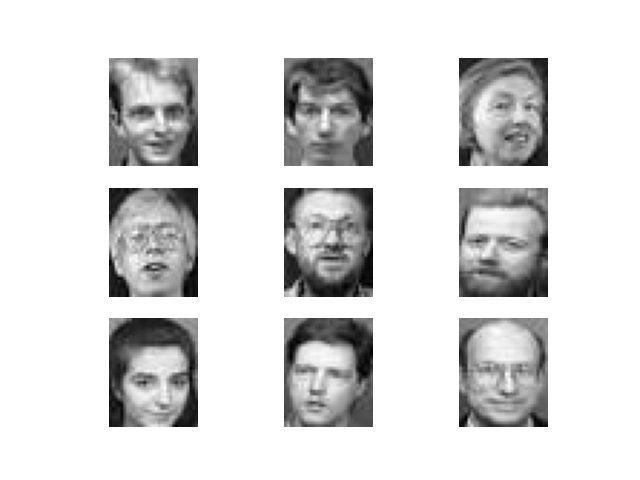

In [4]:
xTr,yTr,xTe,yTe=loaddata(file_loc + "faces.mat")

plt.figure()
plotfaces(xTr[:9, :])


<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the function  <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>

<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [45]:

def l2distance(X,Z=None):
    if Z is None:
        Z=X

    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"

    # YOUR CODE HERE
    
    distances = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            distances[i][j] = np.sum((X[i]-Z[j])**2) 
    
    return distances

def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    # YOUR CODE HERE
    
    I = []
    D = []
    
    print("Train set shape: " + str(xTr.shape))
    print("Test set shape: " + str(xTe.shape))
    
    distances = l2distance(xTe,xTr)
    
    print("Distances shape " + str(distances.shape))
    
    for i in range(xTe.shape[0]):
        d = []
        for j in range(xTr.shape[0]):
            d.append((j,distances[i][j]))
        ## sort the distances list from lower to higher
        d.sort(key=lambda tup: tup[1], reverse = False)
        
        ## extract the k nearest neighbors for the specific test point
        I_knns = []
        D_knns = []
        for i in range(k):
            I_knns.append(d[i][0])
            D_knns.append(d[i][1])
        
        ## append the respective rows of our final results 
        I.append(np.array(I_knns))
        D.append(np.array(D_knns))
    
    indices = np.array(I).T
    dists = np.array(D).T
            
    return indices, dists

In [46]:
findknn(xTr,xTe,3)

Train set shape: (280, 1178)
Test set shape: (120, 1178)
Distances shape (120, 280)


(array([[ 89, 261, 263, 210, 275, 203, 216, 232, 151, 159, 200, 154, 256,
         248, 232, 172, 206, 227,  28,  15, 169, 144, 224,  73,  53, 253,
         177,  43, 123,  54,  42,  51, 118, 261, 149, 268,  82,  66, 138,
          32, 142, 273, 240, 256,  92,   8, 160, 101, 158, 158, 233,  53,
         108, 107,   4,  19, 134, 214,  87, 279, 187, 216, 133, 106,  79,
         216,  63, 262, 163, 225,  21, 226, 109, 233, 150, 135,  54, 252,
          29, 201, 148,  76, 133, 119, 117, 223, 224,  21, 109, 168, 102,
         222, 210, 231,  10, 147,  81, 267, 234, 143, 163,  15,   6, 117,
          53, 173, 239, 171, 112,  28,  42, 252, 132, 100, 146,  80,   7,
         118, 120, 157],
        [270, 138, 211, 123,  17, 105, 191, 161, 113, 220,  56, 204, 181,
         124, 110, 131,  55, 222, 170,  33, 107, 220,  67, 216,  57,  88,
          93, 178,   9,  64, 266, 276, 176, 278, 147,  40, 217,  10,  29,
         137, 116, 186, 190, 238,   6, 119, 108, 180, 127, 127, 219, 237,
         160,

In [47]:
X = np.random.rand(100,10)
print(l2distance(X))

[[0.         1.75748078 1.53405846 ... 2.04060392 0.23213377 1.74231375]
 [1.75748078 0.         1.82122703 ... 1.55027485 1.95139615 1.62607423]
 [1.53405846 1.82122703 0.         ... 1.84612883 1.32640041 2.42077068]
 ...
 [2.04060392 1.55027485 1.84612883 ... 0.         2.08346307 1.80605236]
 [0.23213377 1.95139615 1.32640041 ... 2.08346307 0.         1.71255429]
 [1.74231375 1.62607423 2.42077068 ... 1.80605236 1.71255429 0.        ]]


<h3>l2distance() Code Test Example:</h3>

In [48]:
# Tests diagonal of distance matrix
def distance_test1():
    X = np.random.rand(100,10)
    D = np.diagonal(l2distance(X))
    return (np.sum(D) < 1e-5)
result_distance_test1 = distance_test1()
print('Function l2distance correctly calculates diagonal on above example: ' + str(result_distance_test1))


Function l2distance correctly calculates diagonal on above example: True


<p> The following demo samples random points in 2D. If your findknn  function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.
</p>

<IPython.core.display.Javascript object>


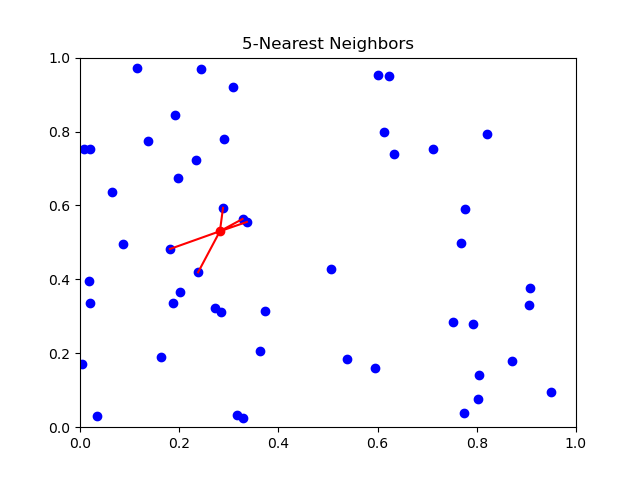

In [50]:
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points). 

<IPython.core.display.Javascript object>


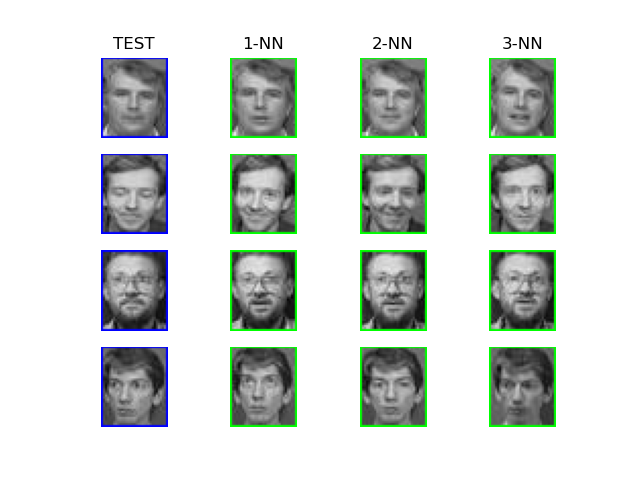

Train set shape: (280, 1178)
Test set shape: (1, 1178)
Distances shape (1, 280)
Train set shape: (280, 1178)
Test set shape: (1, 1178)
Distances shape (1, 280)
Train set shape: (280, 1178)
Test set shape: (1, 1178)
Distances shape (1, 280)
Train set shape: (280, 1178)
Test set shape: (1, 1178)
Distances shape (1, 280)
Click on the images above, to cycle through the test images.


In [51]:
visualize_knn_images(findknn, file_loc, imageType='faces')

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>



In [60]:

def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    if len(truth) == 0 and len(preds) == 0:
        output = 0
        return output
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        # YOUR CODE HERE
        return np.sum(np.absolute((truth - preds)))
    elif kind == 'acc':
        # YOUR CODE HERE
        correct = 0
        for i in range(len(truth)):
            if (truth[i] == preds[i]):
                correct += 1
        return float(correct/len(truth))
    
    return output


<h3>analyze() Code Test Example:</h3>

In [61]:
# Tests the analyze function with kind='abs'
def analyze_test1():
    truth = np.array([1, 2, 3, 4])
    preds = np.array([1, 2, 3, 0])
    return abs(analyze('acc',truth,preds) - 0.75)<1e-10
result_analyze_test1 = analyze_test1()
print('Function analyze correctly calculates acc on above example: ' + str(result_analyze_test1))


Function analyze correctly calculates acc on above example: True


#### <p>(e) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [84]:
 def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    
    preds = []
    
    # fix array shapes
    yTr = yTr.flatten()
    
    # YOUR CODE HERE
    
    I,D = findknn(xTr,xTe,k)
    
    for neighbor_indexes in I.T:
        count_array = np.zeros((k))
        for i in range(k):
            count_array[i]  = yTr[neighbor_indexes[i]]
        count_array = count_array.astype(int)
        counts = np.bincount(count_array)
        preds.append(np.argmax(counts))
        
    preds = np.array(preds)
    
    return preds



In [85]:
knnclassifier(xTr,yTr,xTe,3)

Train set shape: (280, 1178)
Test set shape: (120, 1178)
Distances shape (120, 280)


array([15,  3, 14, 29,  4, 18,  5, 33, 13,  5,  2,  6,  4, 34, 33, 36, 31,
       12, 24,  3,  6,  5, 16,  5,  3, 14,  9,  1, 29, 18,  8, 33, 21,  3,
       39, 32, 22, 26,  3,  7, 22, 35, 37,  4, 10, 13, 19, 25, 28, 28, 37,
       20, 19,  6, 14, 19,  9, 16, 11, 26, 35,  5, 32, 16, 24,  5, 30,  8,
       27, 16, 38, 15,  2, 37, 36, 23, 18, 22,  9,  7, 23, 12, 32, 13, 11,
        3, 16, 38,  2, 10, 35, 12, 29, 27, 26, 39,  7, 30, 34, 15, 27, 25,
       10, 11, 30, 21, 31, 36, 17, 24,  8, 22, 23, 34, 28, 30, 38, 21, 31,
        9])

<h3>knnclassifier() Code Test Example:</h3>

In [86]:
def knnclassifier_test1():
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    return np.array_equal(knnclassifier(X,y,X,1),y)
result_knnclassifier_test1 = knnclassifier_test1()
print('Function knnclassifier correctly calculates acc on above example: ' + str(result_knnclassifier_test1))


Train set shape: (4, 2)
Test set shape: (4, 2)
Distances shape (4, 4)
Function knnclassifier correctly calculates acc on above example: True


<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<p>(e) This script runs the $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes, the digits data set $10$. What classification accuracy would you expect from a random classifier?</p>

In [87]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata(file_loc + "faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
Train set shape: (280, 1178)
Test set shape: (120, 1178)
Distances shape (120, 280)
You obtained 95.83% classification acccuracy in 0.4782 seconds



#### KNN Boundary Visualization
To help give you a visual understanding of how the KNN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below. Click anywhere in the graph to add a negative class point. Hold down SHIFT and click anywhere to add a positive class point. To increase $k$ hold down 'h' and click anywhere.

<IPython.core.display.Javascript object>


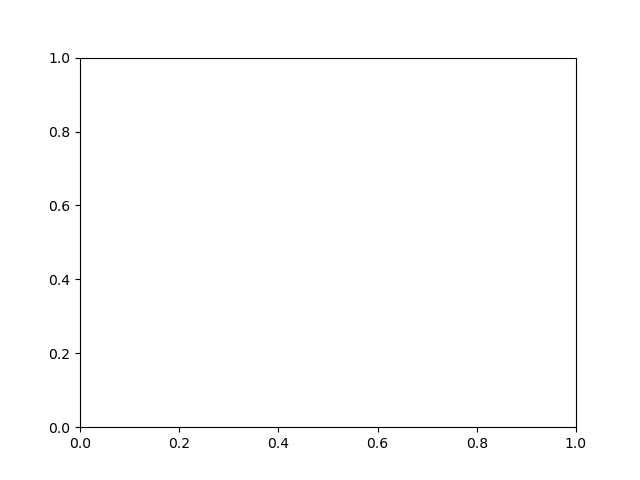

In [89]:
visualize_knn_boundary(knnclassifier)

<p>(f) (optional) Sometimes a $k$-NN classifier can result in a draw, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>

<p>(g) Edit the function <b><code>competition</code></b>, which reads in a training and testing set and makes predictions. Inside this function you are free to use any combination or variation of the k-nearest neighbor classifier. Can you beat my submission on our secret training and testing set? </p>

<h4>Evaluation</h4>
<p>For this project, you will be ranked on the following measures:
<ul>
<li>Percentage of test cases passed</li>
<li>Average of:
<ul>
  <li>Accuracy on the faces test dataset and</li>
  <li>Accuracy on the digits test dataset</li>
  <li>Accuracy on the <i>secret</i> test dataset</li>
</ul>
</ul>

</p>

Let's take a look at the competition data. We will use plotdata function to visualize the first 10 training images from the digit data set and visualize them. Click on images to cycle through the competition data.

<IPython.core.display.Javascript object>


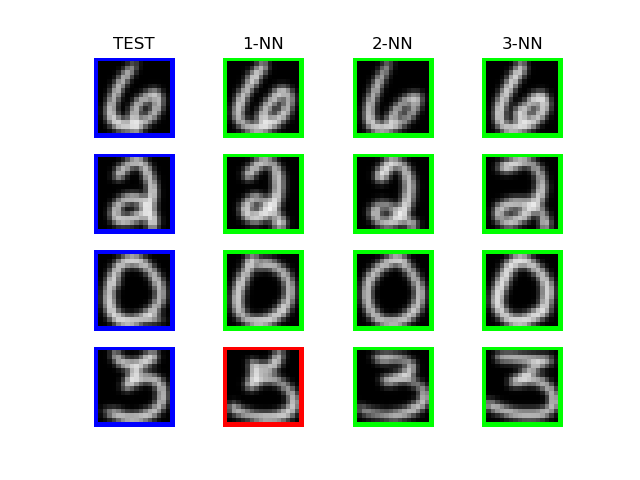

Train set shape: (7291, 256)
Test set shape: (1, 256)
Distances shape (1, 7291)
Train set shape: (7291, 256)
Test set shape: (1, 256)
Distances shape (1, 7291)
Train set shape: (7291, 256)
Test set shape: (1, 256)
Distances shape (1, 7291)
Train set shape: (7291, 256)
Test set shape: (1, 256)
Distances shape (1, 7291)
Click on the images above, to cycle through the test images.


In [90]:
visualize_knn_images(findknn, file_loc, imageType='digits')

In [91]:

def competition(xTr,yTr,xTe):
    """
    function preds=competition(xTr,yTr,xTe);
    
    A classifier that outputs predictions for the data set xTe based on 
    what it has learned from xTr,yTr
    
    Input:
    xTr = nxd input matrix with n column-vectors of dimensionality d
    xTe = mxd input matrix with n column-vectors of dimensionality d
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return preds
